In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import image

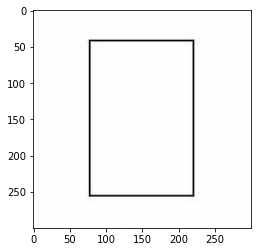

In [2]:
img=image.imread("C:/Users/safae/Downloads/rectangle.jpg")
plt.imshow(img)

In [3]:
print(img.shape)

(300, 300, 3)


In [4]:
from skimage.color import rgb2gray 

In [5]:
from skimage.color import rgb2gray 

(300, 300)


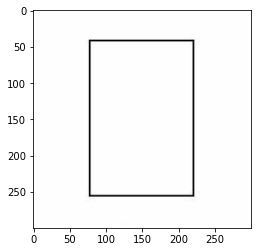

In [6]:
img_gray=rgb2gray(img)
print(img_gray.shape)
plt.imshow(img_gray,cmap="gray")

In [7]:
def convolution(img,kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = img.shape
        y = y - m + 1
        x = x - m + 1
        derive = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                derive[i][j] = np.sum(np.multiply(img[i:i+m, j:j+m],kernel))
    return derive

In [8]:
sobelY=np.array([[1,2,1],
                 [0,0,0],
                 [-1,-2,-1]],dtype=int)
print(sobelY.shape)
gradientY=convolution(img_gray,sobelY)

(3, 3)


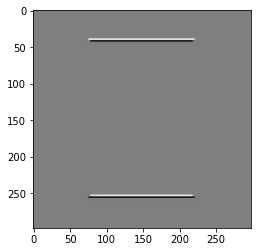

In [9]:
plt.imshow(gradientY,cmap="gray")

In [10]:
sobelX=np.array([[1,0,-1],
                 [2,0,-2],
                 [1,0,-1]],dtype=int)
gradientX=convolution(img_gray,sobelX)

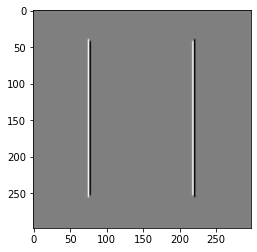

In [11]:
plt.imshow(gradientX,cmap="gray")

##### definir la matrice M

In [12]:
gradientX.shape

(298, 298)

In [13]:
#elimination de bruit
from scipy.ndimage import gaussian_filter
Ixx = gaussian_filter(gradientX**2, sigma=1)
Ixy = gaussian_filter(gradientY*gradientX, sigma=1)
Iyy = gaussian_filter(gradientY**2, sigma=1)

In [14]:
k = 0.04

# determinant
detA = Ixx * Iyy - Ixy ** 2
# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2

In [15]:
harris_response.shape

(298, 298)

In [16]:
harris_response

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
edge=np.where(harris_response<0,harris_response,0)
coin=np.where(harris_response>0.501,harris_response,0)

In [18]:
print(coin.shape)

(298, 298)


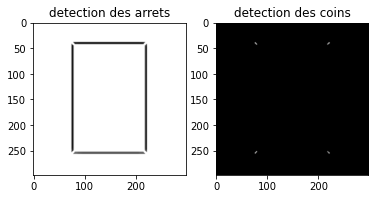

In [19]:
plt.figure()
plt.subplot(1,2,1)
plt.title("detection des arrets")
plt.imshow(edge,cmap="gray")

plt.subplot(1,2,2)
plt.title("detection des coins")
plt.imshow(coin,cmap="gray")

In [20]:
img_copy_for_corners = np.copy(img)

for i in range(coin.shape[0]):
    for j in range(coin.shape[1]):
        if coin[i][j] > 0:
            # this is a corner
            img_copy_for_corners[i, j] = [255,90,90]
       

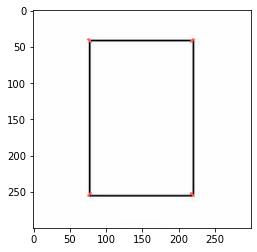

In [21]:
plt.imshow( img_copy_for_corners)